## Chess dataset. 

Link to the dataset: https://www.kaggle.com/datasets/datasnaek/chess

General Info

This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. This set contains the:

- Game ID;
- Rated (T/F);
- Start Time;
- End Time;
- Number of Turns;
- Game Status;
- Winner;
- Time Increment;
- White Player ID;
- White Player Rating;
- Black Player ID;
- Black Player Rating;
- All Moves in Standard Chess Notation;
- Opening Eco (Standardised Code for any given opening, list here);
- Opening Name;
- Opening Ply (Number of moves in the opening phase)

For each of these separate games from Lichess. I collected this data using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

df = pd.read_csv('games.csv')

### Check number of empty records

In [2]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

### The structure of the dataset

In [3]:
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


## Let's make value counts of different columns 

Text(0.5, 1.0, 'Value Counts of rated games')

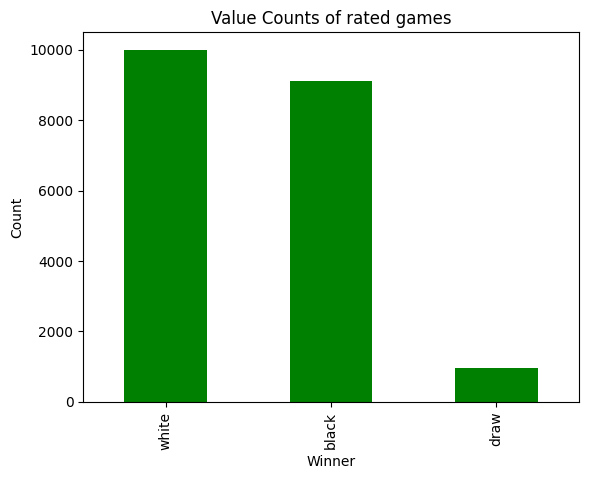

In [4]:
df['winner'].value_counts().plot(kind='bar', color='green')


plt.xlabel('Winner')
plt.ylabel('Count')
plt.title('Value Counts of rated games')

Text(0.5, 1.0, 'Value Counts of rated games')

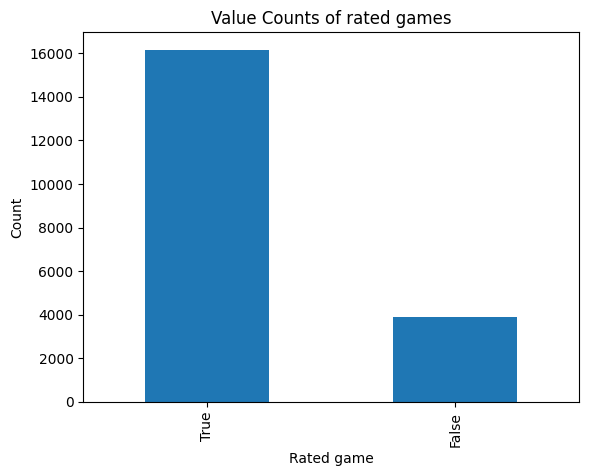

In [5]:
df['rated'].value_counts().plot(kind='bar')

plt.xlabel('Rated game')
plt.ylabel('Count')
plt.title('Value Counts of rated games')

<Axes: xlabel='victory_status'>

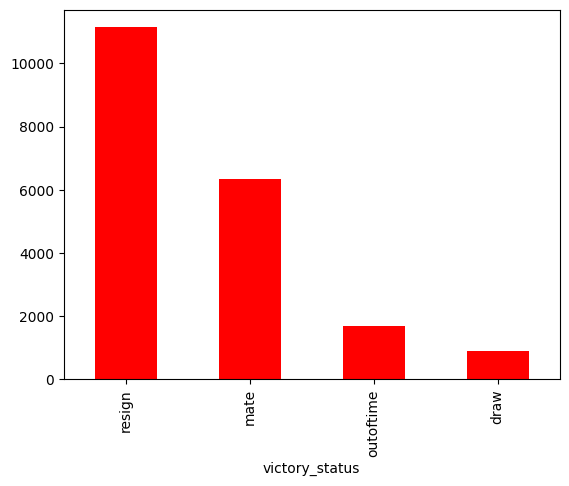

In [ ]:
df['victory_status'].value_counts().plot(kind='bar', color='red')

In [7]:
df['opening_name'].value_counts()[:10] #top 10 openings

opening_name
Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
Scotch Game                                      271
French Defense: Knight Variation                 271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: count, dtype: int64

In [8]:
df['increment_code'].value_counts()[:10]

increment_code
10+0     7721
15+0     1311
15+15     850
5+5       738
5+8       697
8+0       588
10+5      579
15+10     461
20+0      448
30+0      375
Name: count, dtype: int64

In [ ]:
len(np.union1d(df['white_id'].unique(), df['black_id'].unique())) ## total number of players in dataset

15635

### Description of turns (number of turns per game) column

As we can see, games have 60 moves on averages

In [10]:
df['turns'].describe()

count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

(array([8.540e+02, 1.566e+03, 2.259e+03, 3.171e+03, 3.058e+03, 2.724e+03,
        1.960e+03, 1.269e+03, 1.069e+03, 7.460e+02, 5.590e+02, 3.460e+02,
        2.050e+02, 1.290e+02, 7.500e+01, 2.600e+01, 1.700e+01, 1.200e+01,
        6.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  1. ,  12.6,  24.2,  35.8,  47.4,  59. ,  70.6,  82.2,  93.8,
        105.4, 117. , 128.6, 140.2, 151.8, 163.4, 175. , 186.6, 198.2,
        209.8, 221.4, 233. , 244.6, 256.2, 267.8, 279.4, 291. , 302.6,
        314.2, 325.8, 337.4, 349. ]),
 <BarContainer object of 30 artists>)

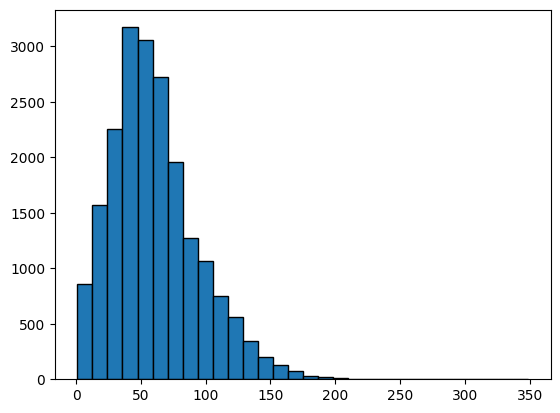

In [ ]:
plt.hist(df['turns'], bins=30, edgecolor='black')

## Let's analyse the rating of players

(array([  48.,  132.,  351.,  731., 1070., 1818., 2172., 3246., 2336.,
        2226., 1807., 1516., 1056.,  609.,  467.,  283.,   87.,   63.,
          10.,   30.]),
 array([ 784. ,  879.8,  975.6, 1071.4, 1167.2, 1263. , 1358.8, 1454.6,
        1550.4, 1646.2, 1742. , 1837.8, 1933.6, 2029.4, 2125.2, 2221. ,
        2316.8, 2412.6, 2508.4, 2604.2, 2700. ]),
 <BarContainer object of 20 artists>)

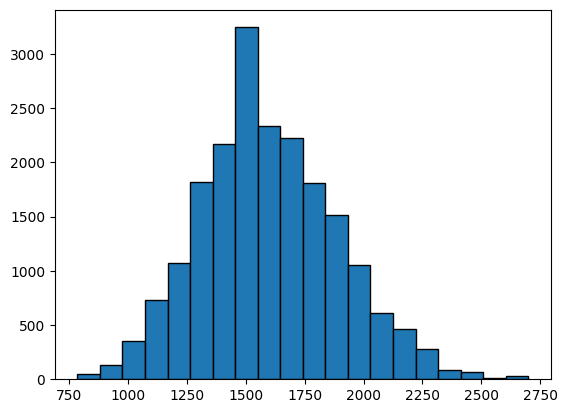

In [25]:
plt.hist(df['white_rating'], bins=20, edgecolor='black')

(array([7.000e+01, 1.870e+02, 3.730e+02, 7.920e+02, 1.238e+03, 1.861e+03,
        2.263e+03, 3.272e+03, 2.347e+03, 2.140e+03, 1.782e+03, 1.378e+03,
        9.710e+02, 5.940e+02, 4.310e+02, 2.370e+02, 6.700e+01, 3.500e+01,
        1.900e+01, 1.000e+00]),
 array([ 789. ,  885.7,  982.4, 1079.1, 1175.8, 1272.5, 1369.2, 1465.9,
        1562.6, 1659.3, 1756. , 1852.7, 1949.4, 2046.1, 2142.8, 2239.5,
        2336.2, 2432.9, 2529.6, 2626.3, 2723. ]),
 <BarContainer object of 20 artists>)

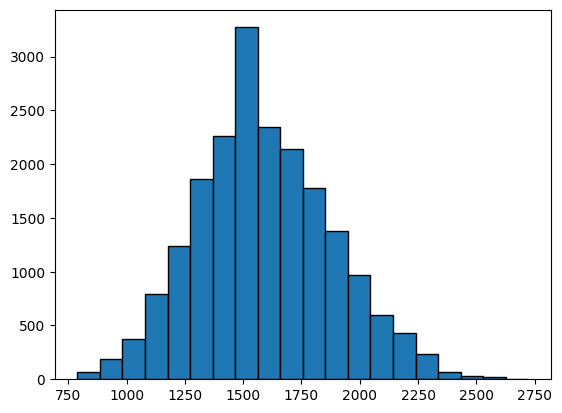

In [26]:
plt.hist(df['black_rating'], bins=20, edgecolor='black')

## From there, let's try to conduct an analysis and answer different questions

Firstly, let's add some new columns

In [12]:
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [13]:
df['rating_difference'] = df['white_rating'] - df['black_rating']

### Let's find out how often do white win when they have more rating

In [14]:
white_favorite_win_count = len(df[(df['winner'] == 'white') & (df['rating_difference'] > 0)])
white_favorite_count = len(df[df['rating_difference'] > 0])

white_favorite_win_count / white_favorite_count

0.6411036920659858

In [15]:
len(df[(df['winner'] == 'black') & (df['rating_difference'] > 0)]) / len(df[df['rating_difference'] > 0])

0.3131382560879811

In [16]:
len(df[(df['winner'] == 'draw') & (df['rating_difference'] > 0)]) / len(df[df['rating_difference'] > 0])

0.045758051846032995

In [17]:
df[df['rating_difference'] > 0]['winner'].value_counts(normalize=True)

winner
white    0.641104
black    0.313138
draw     0.045758
Name: proportion, dtype: float64

### The same but for black (black have more rating than white)

In [18]:
df[df['rating_difference'] < 0]['winner'].value_counts(normalize=True)

winner
black    0.602109
white    0.349188
draw     0.048702
Name: proportion, dtype: float64

As we can see, it is more likely that white will win in case they have more rating (64.1%). Meanwhile, in only 60.2% of games black won when they had more rating

### Now Let's see which openings are more likely to help to win the game. Filter: the opening must be played at least 100 times 

In [19]:
frequent_openings = df['opening_name'].value_counts()[df['opening_name'].value_counts() > 100].index
frequent_openings

Index(['Van't Kruijs Opening', 'Sicilian Defense',
       'Sicilian Defense: Bowdler Attack', 'Scotch Game',
       'French Defense: Knight Variation',
       'Scandinavian Defense: Mieses-Kotroc Variation',
       'Queen's Pawn Game: Mason Attack',
       'Queen's Pawn Game: Chigorin Variation', 'Scandinavian Defense',
       'Horwitz Defense', 'Caro-Kann Defense', 'Philidor Defense #3',
       'Philidor Defense #2', 'Indian Game',
       'Italian Game: Anti-Fried Liver Defense',
       'Four Knights Game: Italian Variation', 'Modern Defense',
       'Owen Defense', 'King's Pawn Game: Wayward Queen Attack',
       'Sicilian Defense: Old Sicilian',
       'King's Pawn Game: Leonardis Variation', 'Queen's Pawn Game',
       'Philidor Defense', 'Ruy Lopez: Steinitz Defense', 'Hungarian Opening',
       'French Defense: Normal Variation', 'Queen's Pawn', 'Bishop's Opening',
       'Queen's Gambit Refused: Marshall Defense', 'Queen's Pawn Game #2',
       'Queen's Gambit Declined', 'Queen'

In [20]:
df_frequent_openings = df[df['opening_name'].isin(frequent_openings)]

#### Top 10 openings when white win more frequently

In [21]:
(df_frequent_openings[(df_frequent_openings['winner'] == 'white')]['opening_name'].value_counts() / df_frequent_openings['opening_name'].value_counts()).sort_values(ascending=False)[:10]

opening_name
Queen's Gambit Refused: Marshall Defense         0.661417
Queen's Pawn                                     0.658915
Philidor Defense #3                              0.641414
Scandinavian Defense: Mieses-Kotroc Variation    0.633205
Philidor Defense                                 0.622222
Queen's Gambit Declined                          0.594828
French Defense: Normal Variation                 0.589147
Pirc Defense #4                                  0.588785
Italian Game                                     0.568807
Queen's Gambit Accepted: Old Variation           0.558559
Name: count, dtype: float64

#### Top 10 openings when black win more frequently

In [22]:
(df_frequent_openings[(df_frequent_openings['winner'] == 'black')]['opening_name'].value_counts() / df_frequent_openings['opening_name'].value_counts()).sort_values(ascending=False)[:10]

opening_name
Van't Kruijs Opening                      0.614130
Sicilian Defense: Old Sicilian            0.584906
Queen's Pawn Game                         0.584507
Sicilian Defense: Bowdler Attack          0.554054
Indian Game                               0.552486
Scandinavian Defense                      0.551570
Sicilian Defense                          0.541899
King's Pawn Game: Leonardis Variation     0.538961
Giuoco Piano                              0.518519
King's Pawn Game: Wayward Queen Attack    0.512195
Name: count, dtype: float64

## Let's compare how many moves white need to win and how many moves black need to win on average

In [30]:
df['winner'].unique()

array(['white', 'black', 'draw'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0e759beb20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0e759bc0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0e759b5700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0e759bc5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e759bc880>],
 'means': []}

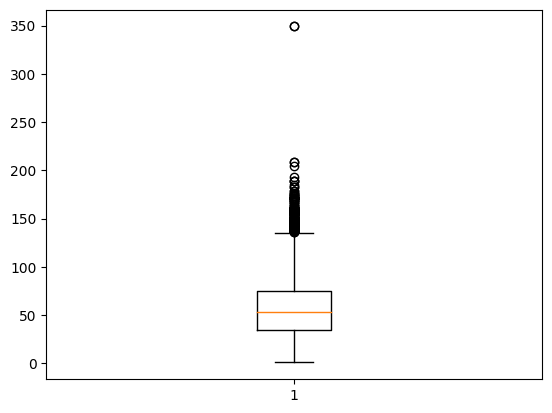

In [35]:
plt.boxplot(df[df['winner'] == 'white']['turns'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0e7592aee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0e7593b460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0e7592ac40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0e7593b910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e7593bbb0>],
 'means': []}

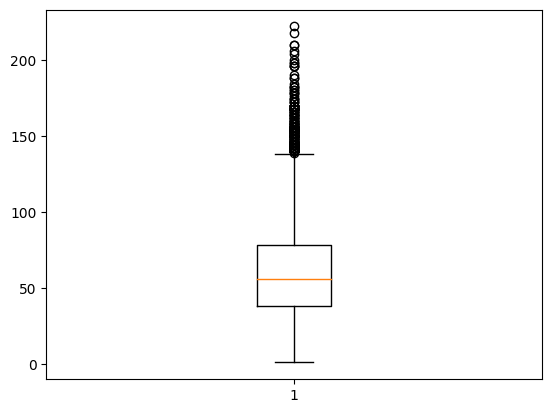

In [36]:
plt.boxplot(df[df['winner'] == 'black']['turns'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0e7591d4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0e7591da00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0e7591d220>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0e759698b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e7591dbb0>],
 'means': []}

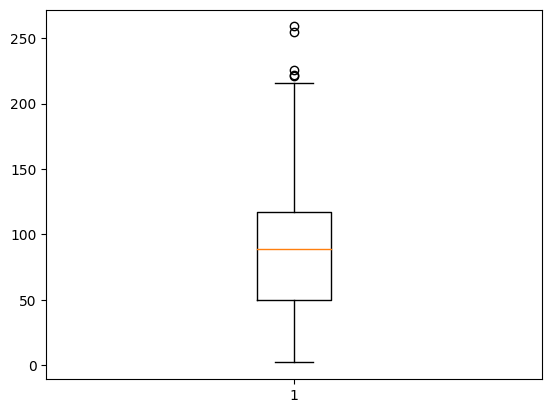

In [37]:
plt.boxplot(df[df['winner'] == 'draw']['turns'])

## Depending on whether game is rated or not, let's see check how usually players finish the game

In [38]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply',
       'rating_difference'],
      dtype='object')

In [39]:
df['rated'].unique()

array([False,  True])

In [40]:
df[df['rated'] == False]['victory_status'].value_counts()

victory_status
resign       2178
mate         1179
outoftime     321
draw          225
Name: count, dtype: int64

In [41]:
df[df['rated'] == True]['victory_status'].value_counts()

victory_status
resign       8969
mate         5146
outoftime    1359
draw          681
Name: count, dtype: int64